<a href="https://colab.research.google.com/github/DLebedyuk/Chemicals/blob/master/SMRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow 
#import network3
#from network3 import Network
#from network3 import *
from tensorflow import keras
from keras import layers
from keras import activations
from keras.layers import Dense
from keras.layers import InputLayer
from keras.models import Sequential
from keras.activations import ReLU
from sklearn import *
from sklearn import utils
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV

In [ ]:
spec_N = 385
x_train_params = pd.read_excel(r'result_first_exp_2.xlsx') 
X_train = x_train_params[:spec_N]
X_train.astype('float64')
X_test = pd.read_excel(r'result_snd_exp_2.xlsx')
X_test.astype('float64')
y_train_params = pd.read_excel(r'sample_first_exp_1.xlsx') 
y_train = y_train_params[['R_Pd-Pd']][:spec_N]
y_train.astype('float64')
y_test_params = pd.read_excel(r'sample_snd_exp_1.xlsx')
y_test = y_test_params[['R_Pd-Pd']][:spec_N]
x = []
for i in range(len(x_train_params)): x.append(i)
print(y_train)
#plt.scatter(x,x_train_params)
#plt.show()

      R_Pd-Pd
0    2.798787
1    2.796946
2    2.785716
3    2.780199
4    2.762011
..        ...
319  2.812520
320  2.817835
321  2.816649
322  2.818001
323  2.809295

[324 rows x 1 columns]


Построение графиков для анализа точности предсказания

In [ ]:
#@title Текст заголовка по умолчанию
def T_plot(data, prediction):
    x = range(len(data))
    try:
        plt.plot(x, prediction[:,0],'ro', label='prediction')
    except:
        plt.plot(x, prediction,'ro', label='prediction')
    plt.plot(x,  data, 'bo', label='real')
    plt.xlabel('Spectra number')
    plt.ylabel('T (C)')
    plt.legend(fontsize = 'xx-small', loc = 'lower right')
    plt.savefig('prediction T.jpg', dpi=600, bbox_inches='tight')
    plt.show()
    try:
        rms = np.sqrt(sum(abs(prediction[:,0]-data)*abs(prediction[:,0]-data))/len(data))
    except:
        rms = np.sqrt(sum(abs(prediction-data)*abs(prediction-data))/len(data))
    try:
        plt.plot(x,  abs(prediction[:,0]-data), 'r', label='real')
    except:
        plt.plot(x,  abs(prediction-data), 'r', label='real')
    plt.xlabel('Spectra number')
    plt.ylabel('T error (C)')
    plt.title('RMS = ' + '%.3f' % rms, fontsize=10)
    plt.savefig('prediction error T.jpg', dpi=600, bbox_inches='tight')
    plt.show()
    
def R_plot(data, prediction):
    x = range(len(data))
    try:
        plt.plot(x, prediction[:,0],'ro', label='prediction')
    except:
        plt.plot(x, prediction,'ro', label='prediction')
    plt.plot(x,  data, 'bo', label='real')
    plt.xlabel('Spectra number')
    plt.ylabel('R (A)')
    plt.legend(fontsize = 'xx-small', loc = 'lower right')
    plt.savefig('prediction R.jpg', dpi=600, bbox_inches='tight')
    plt.show()
    
    try:
        rms = np.sqrt(sum(abs(prediction[:,0]-data)*abs(prediction[:,0]-data))/len(data))
    except:
        rms = np.sqrt(sum(abs(prediction-data)*abs(prediction-data))/len(data))
    try:
        plt.plot(x,  abs(prediction[:,0]-data), 'r', label='real')
    except:
        plt.plot(x,  abs(prediction-data), 'r', label='real')
    plt.xlabel('Spectra number')
    plt.ylabel('R error (A)')
    plt.title('RMS = ' + '%.3f' % rms, fontsize=10)
    plt.savefig('prediction error R.jpg', dpi=600, bbox_inches='tight')
    plt.show()
    
def N_plot(data, prediction):
    x = range(len(data))
    try:
        plt.plot(x, prediction[:,0],'ro', label='prediction')
    except:
        plt.plot(x, prediction,'ro', label='prediction')
    plt.plot(x,  data, 'bo', label='real')
    plt.xlabel('Spectra number')
    plt.ylabel('N')
    plt.legend(fontsize = 'xx-small', loc = 'lower right')
    plt.savefig('prediction N.jpg', dpi=600, bbox_inches='tight')
    plt.show()
    try:
        rms = np.sqrt(sum(abs(prediction[:,0]-data)*abs(prediction[:,0]-data))/len(data))
    except:
        rms = np.sqrt(sum(abs(prediction-data)*abs(prediction-data))/len(data))
    try:
        plt.plot(x,  abs(prediction[:,0]-data), 'r', label='real')
    except:
        plt.plot(x,  abs(prediction-data), 'r', label='real')
    plt.xlabel('Spectra number')
    plt.ylabel('N error')
    plt.title('RMS = ' + '%.3f' % rms, fontsize=10)
    plt.savefig('prediction error N.jpg', dpi=600, bbox_inches='tight')
    plt.show()

def Amp_plot(data, prediction):
    x = range(len(data))
    try:
        plt.plot(x, prediction[:,0],'ro', label='prediction')
    except:
        plt.plot(x, prediction,'ro', label='prediction')
    plt.plot(x,  data, 'bo', label='real')
    plt.xlabel('Spectra number')
    plt.ylabel('N*S02')
    plt.legend(fontsize = 'xx-small', loc = 'lower right')
    plt.savefig('prediction Amp.jpg', dpi=600, bbox_inches='tight')
    plt.show()
    try:
        rms = np.sqrt(sum(abs(prediction[:,0]-data)*abs(prediction[:,0]-data))/len(data))
    except:
        rms = np.sqrt(sum(abs(prediction-data)*abs(prediction-data))/len(data))
    try:
        plt.plot(x,  abs(prediction[:,0]-data), 'r', label='real')
    except:
        plt.plot(x,  abs(prediction-data), 'r', label='real')
    plt.xlabel('Spectra number')
    plt.ylabel('Amp error')
    plt.title('RMS = ' + '%.3f' % rms, fontsize=10)
    plt.savefig('prediction error Amp.jpg', dpi=600, bbox_inches='tight')
    plt.show()
    
def Sigma2_plot(data, prediction):
    x = range(len(data))
    try:
        plt.plot(x, prediction[:,0],'ro', label='prediction')
    except:
        plt.plot(x, prediction,'ro', label='prediction')
    plt.plot(x,  data, 'bo', label='real')
    plt.xlabel('Spectra number')
    plt.ylabel('Sigma2')
    plt.legend(fontsize = 'xx-small', loc = 'lower right')
    plt.savefig('prediction Sigma2.jpg', dpi=600, bbox_inches='tight')
    plt.show()
    try:
        rms = np.sqrt(sum(abs(prediction[:,0]-data)*abs(prediction[:,0]-data))/len(data))
    except:
        rms = np.sqrt(sum(abs(prediction-data)*abs(prediction-data))/len(data))
    try:
        plt.plot(x,  abs(prediction[:,0]-data), 'r', label='real')
    except:
        plt.plot(x,  abs(prediction-data), 'r', label='real')
    plt.xlabel('Spectra number')
    plt.ylabel('Sigma2 error')
    plt.title('RMS = ' + '%.6f' % rms, fontsize=10)
    plt.savefig('prediction error Sigma2.jpg', dpi=600, bbox_inches='tight')
    plt.show()
    
def deltaE0_plot(data, prediction):
    x = range(len(data))
    try:
        plt.plot(x, prediction[:,0],'ro', label='prediction')
    except:
        plt.plot(x, prediction,'ro', label='prediction')
    plt.plot(x,  data, 'bo', label='real')
    plt.xlabel('Spectra number')
    plt.ylabel('deltaE0 (eV)')
    plt.legend(fontsize = 'xx-small', loc = 'lower right')
    plt.savefig('prediction deltaE0.jpg', dpi=600, bbox_inches='tight')
    plt.show()
    try:
        rms = np.sqrt(sum(abs(prediction[:,0]-data)*abs(prediction[:,0]-data))/len(data))
    except:
        rms = np.sqrt(sum(abs(prediction-data)*abs(prediction-data))/len(data))
    try:
        plt.plot(x,  abs(prediction[:,0]-data), 'r', label='real')
    except:
        plt.plot(x,  abs(prediction-data), 'r', label='real')
    plt.xlabel('Spectra number')
    plt.ylabel('deltaE0 error (eV)')
    plt.title('RMS = ' + '%.6f' % rms, fontsize=10)
    plt.savefig('prediction error deltaE0.jpg', dpi=600, bbox_inches='tight')
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


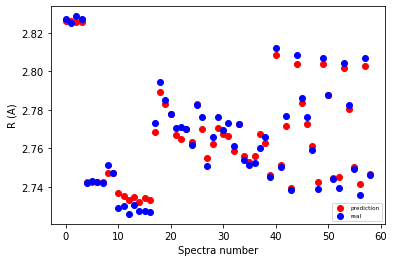

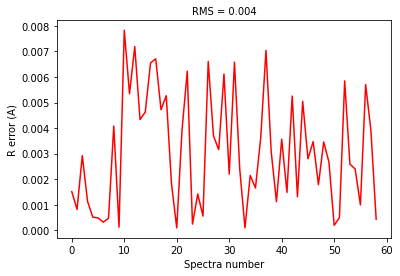

In [ ]:
#print(y_train)
#plt.scatter(list(range(len(y_train))),  y_train)
#plt.show()
model = ensemble.ExtraTreesRegressor(n_estimators= 70, random_state=0)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
#print(np.array(y_test.values.tolist()).ravel())
#print(prediction)
R_plot(np.array(y_test.values.tolist()).ravel(), list(prediction))


Нейронная сеть для классификации. 
Сигналы проходят через слои нейронов и обобщаются в один из нескольких классов. Однако их можно очень быстро адаптировать в регрессионные модели, если изменить последнюю функцию активации.
Каждый нейрон передает значения из предыдущей связи через функцию активации, служащую цели обобщения и нелинейности. Обычно активационная функция — это что-то вроде сигмоиды или функции ReLU (выпрямленный линейный блок).

In [ ]:
model = keras.Sequential()
model.add(Dense(100, input_dim=3, activation='sigmoid'))
model.add(ReLU(alpha=1.0))
model.add(Dense(50, activation='sigmoid'))
model.add(keras.activations.relu(aplha=1.0))
model.add(Dense(25, activation='softmax'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(prediction)
R_plot(np.array(y_test.values.tolist()).ravel(), np.array(prediction).ravel())



TypeError: ignored

Деревья решений
Деревья решений в классификации и регрессии очень похожи, поскольку работают путем построения деревьев с узлами «да/нет». Однако в то время как конечные узлы классификации приводят к одному значению класса (например, 1 или 0 для задачи бинарной классификации), деревья регрессии заканчиваются значением в непрерывном режиме (например, 4593,49 или 10,98).

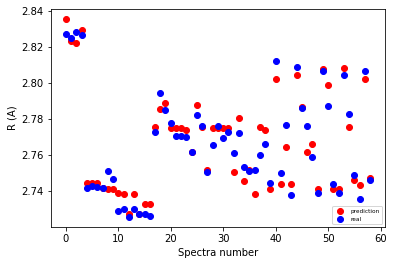

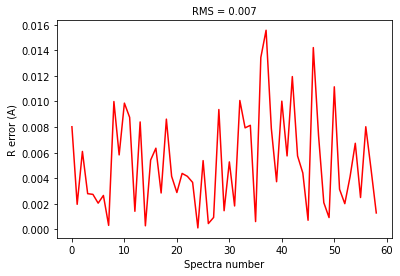

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
R_plot(np.array(y_test.values.tolist()).ravel(), list(prediction))

Алгоритм случайного леса
Дополнение: близкий родственник дерева решений, алгоритм random forest, также может быть реализован в качестве регрессора. Регрессор случайного леса может работать лучше или не лучше, чем дерево решений в регрессии (в то время как он обычно работает лучше в классификации) из-за тонкого баланса между избыточным и недостаточным в природе алгоритмов построения дерева.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


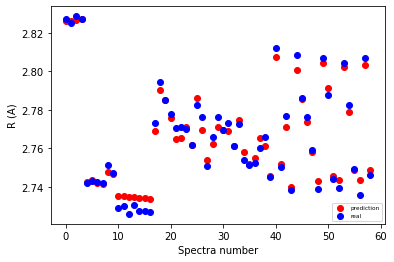

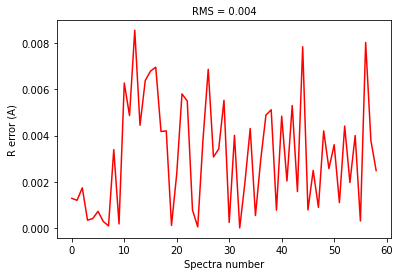

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
R_plot(np.array(y_test.values.tolist()).ravel(), list(prediction))

Метод регрессии лассо 
LASSO, Least Absolute Shrinkage and Selection Operator — это вариация линейной регрессии, специально адаптированная для данных, которые демонстрируют сильную мультиколлинеарность (то есть сильную корреляцию признаков друг с другом).

Она автоматизирует части выбора модели, такие как выбор переменных или исключение параметров. LASSO использует сжатие коэффициентов (shrinkage), то есть процесс, в котором значения данных приближаются к центральной точке (например среднему значению).

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.202e-04, tolerance: 3.458e-05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


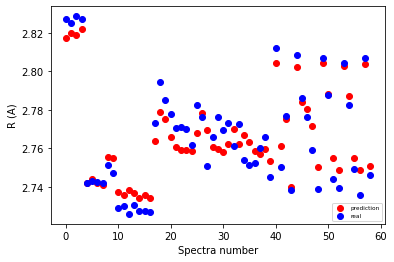

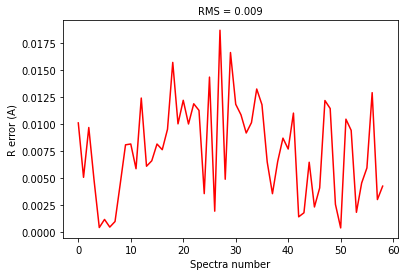

In [ ]:
model = LassoCV()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
R_plot(np.array(y_test.values.tolist()).ravel(), list(prediction))

Гребневая регрессия 
Ридж-регрессия очень похожа на регрессию LASSO в том, что она применяет сжатие. Оба алгоритма хорошо подходят для наборов данных с большим количеством признаков, которые не являются независимыми друг от друга (коллинеарность).

Однако самое большое различие между ними в том, что гребневая регрессия использует регуляризацию L2, то есть ни один из коэффициентов не становится нулевым, как это происходит в регрессии LASSO. Вместо этого коэффициенты всё больше приближаются к нулю, но не имеют большого стимула достичь его из-за природы регуляризации L2.

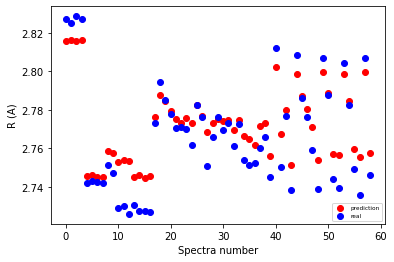

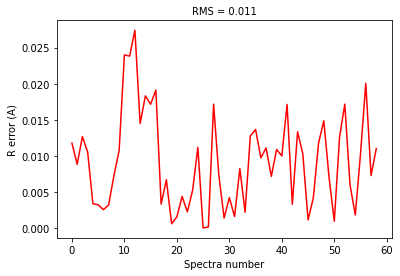

In [ ]:
model = linear_model.Ridge()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
R_plot(np.array(y_test.values.tolist()).ravel(), np.array(prediction).ravel())

ElasticNet 
Этот вариант стремится объединить лучшее из гребневой регрессии и регрессии лассо, комбинируя регуляризацию L1 и L2.

Лассо и гребневая регрессия представляют собой два различных метода регуляризации. В обоих случаях λ — это ключевой фактор, который контролирует размер штрафа:


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.218e-04, tolerance: 3.458e-05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


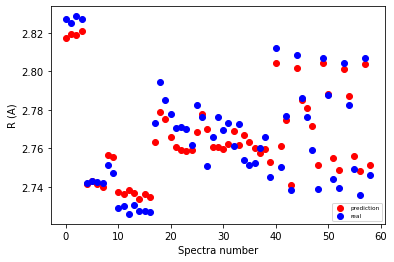

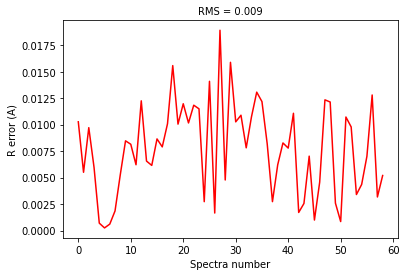

In [ ]:
model = ElasticNetCV()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
R_plot(np.array(y_test.values.tolist()).ravel(), list(prediction))

Метод ближайших соседей

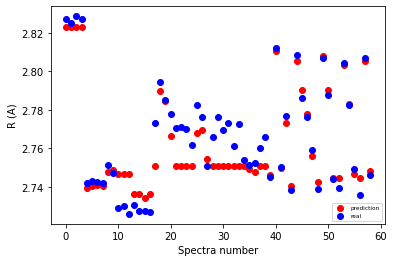

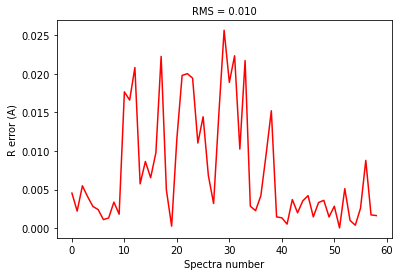

In [ ]:
#knn = KNeighborsRegressor(n_neighbors=5)
model = neighbors.KNeighborsRegressor(n_neighbors=5)
#knn.fit(x.reshape(-1,1),y)
#KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
#          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
#          weights='uniform')

model.fit(X_train, y_train)
prediction = model.predict(X_test)
R_plot(np.array(y_test.values.tolist()).ravel(), np.array(prediction).ravel())

#X_test = np.linspace(0,2*np.pi,1000).reshape(-1,1)
#y_ = knn.predict(X_test)
#plt.plot(X_test,y_,color = 'green') 
#plt.scatter(x,y,color = 'red')